1636917620	11/14/2021 19:20	1.01	122	322	23
1636917623	11/14/2021 19:20	1.01	93	287	23
1636917626	11/14/2021 19:20	0.67	167	409	23
1636917629	11/14/2021 19:20	1.01	113	377	23
1636917632	11/14/2021 19:20	1.01	86	366	23

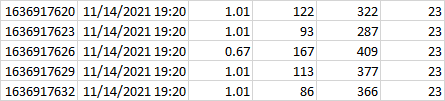

# Representing CO2 as 2 bytes
- 0 to 40,000 ppm

$$ ppm = 256[B_1] + [B_2] $$

In [1]:
ppm = 420

#Function: 16 bit to 2 bytes
def ppm_to_byte(ppm):
    b1 = ppm//256
    b2 = ppm - b1*256
    return b1, b2

#Function: 2 bytes to 16 bit
def byte_to_ppm(b1, b2):
    ppm = b1*256 + b2
    return ppm

print(ppm_to_byte(ppm))

(1, 164)


# Representing Temp as 1 byte
- -40°C – 70°C

In [2]:
temp = 60

#Function: 8 bit to 1 byte
def temp_to_byte(temp):
    b1 = temp + 40
    return b1


#Function: 1 byte to 8 bit
def byte_to_temp(b1):
    temp = b1 - 40
    return temp
print(temp_to_byte(temp))
print(byte_to_temp(temp_to_byte(temp)))

100
60


# Representing Unixtime as 4 bytes

$$ ut = 256^3[B_1] + 256^2[B_2] + 256[B_3] + [B_4] $$

In [3]:
#Function: 32 bit to 4 bytes
def ut_to_byte(ut):
    b1 = ut//256**3
    b2 = ut//256**2 - b1*256
    b3 = ut//256**1 - b1*256**2 - b2*256
    b4 = ut - b1*256**3 - b2*256**2 - b3*256
    return b1, b2, b3, b4

#Function: 4 bytes to 32 bit
def byte_to_ut(b1, b2, b3, b4):
    ut = b1*256**3 + b2*256**2 + b3*256**1 + b4
    return ut

# Representing WS and WD as 2 bytes
WS needs to go from 0 to 127 <br>
WD needs to go from 0 to 359

In [4]:
ws = 127
wd = 358
print((ws, wd))

# Function: ws and wd to 2 bytes
def wind_to_byte(ws, wd): 
    b1 = wd//2

    if (wd%2) == 1:
        b2 = ws + 128 # wd is odd 
    else:
        b2 = ws # wd is even
    return b1, b2

print(wind_to_byte(ws, wd))


#Function: 2 bytes to ws and wd
def byte_to_wind(b1, b2):
    if b2 > 127:
        wd = b1*2 + 1
        ws = b2 - 128
    else:
        wd = b1*2
        ws = b2
    return ws, wd

print(byte_to_wind(*wind_to_byte(ws, wd)))

(127, 358)
(179, 127)
(127, 358)


# Data to Byte

#### Header
$$[B_{h1}] [B_{u1}] [B_{u2}] [B_{u3}] [B_{u4}] [B_{h2}]$$

#### Data
$$[B_{ni}] ... [B_{s1}] [B_{w1}] [B_{w2}] [B_{c1}] [B_{c2}] [B_{t1}] $$

#### Data
$$[B_{ni}]...[B_{s1}] [B_{w1}] [B_{w2}] [B_{c1}] [B_{c2}] [B_{t1}] $$

In [11]:
row1 = (255, 97, 145, 97, 116, 255) # ut 1636917620
row2 = (10, 179, 127, 1, 164, 100) # 10 sec, 127 ws, 358 wd, 420 ppm, 60 celsius
row3 = (13, 179, 127, 1, 164, 100) # 13 sec, 127 ws, 358 wd, 420 ppm, 60 celsius

def translate(row):
    if row[0] == 255 and row[5] == 255:
        # Header
        ut = byte_to_ut(row[1], row[2], row[3], row[4])
        print('Header', ut)

    else:
        # Data
        sec = row[0]
        ws, wd = byte_to_wind(row[1], row[2])
        conc = byte_to_ppm(row[3], row[4])
        temp = byte_to_temp(row[5])
        print('Data', sec, ws, wd, conc, temp)

translate(row1)
translate(row2)
translate(row3)

Header 1636917620
Data 10 127 358 420 60
Data 13 127 358 420 60


In [14]:
bin(2)

'0b10'

In [15]:
hex(2)

'0x2'